In [0]:
#Dependecies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [3]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [4]:
#Store the data into a frame
df = pd.read_csv('TSLA.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-20,202.800003,206.000000,195.250000,205.360001,205.360001,20526200
1,2019-05-21,197.759995,207.399994,196.039993,205.080002,205.080002,18003900
2,2019-05-22,199.100006,203.940002,191.779999,192.729996,192.729996,18685200
3,2019-05-23,194.339996,199.470001,186.220001,195.490005,195.490005,26547100
4,2019-05-24,199.830002,199.979996,188.750000,190.630005,190.630005,14136600
5,2019-05-28,191.199997,195.000000,187.850006,188.699997,188.699997,10312900


In [5]:
#Get the number of trading days
df.shape

(252, 7)

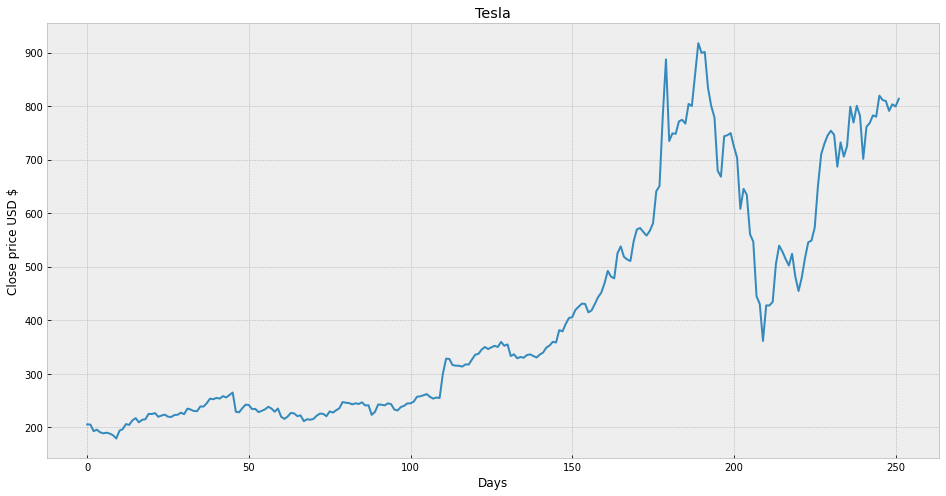

In [8]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Close price USD $')
plt.plot(df['Close'])
plt.show()

In [9]:
#Get the close price
df = df[['Close']]
df.head(4)

,Close
0,205.360001
1,205.080002
2,192.729996
3,195.490005


In [11]:
#Create a variable to predict the 'x' days out into the future
future_days = 25
#Create column for target data (x unints/days)
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)


,Close,Prediction
248,790.960022,NaN
249,803.330017,NaN
250,799.169983,NaN
251,813.630005,NaN


In [12]:
#Create the feature data set (X) and convert it tit np array and remove 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[205.360001]
 [205.080002]
 [192.729996]
 [195.490005]
 [190.630005]
 [188.699997]
 [189.860001]
 [188.220001]
 [185.160004]
 [178.970001]
 [193.600006]
 [196.589996]
 [205.949997]
 [204.5     ]
 [212.880005]
 [217.100006]
 [209.259995]
 [213.910004]
 [214.919998]
 [225.029999]
 [224.740005]
 [226.429993]
 [219.619995]
 [221.860001]
 [223.639999]
 [219.759995]
 [219.270004]
 [222.839996]
 [223.460007]
 [227.169998]
 [224.550003]
 [234.899994]
 [233.100006]
 [230.339996]
 [230.059998]
 [238.919998]
 [238.600006]
 [245.080002]
 [253.5     ]
 [252.380005]
 [254.860001]
 [253.539993]
 [258.179993]
 [255.679993]
 [260.170013]
 [264.880005]
 [228.820007]
 [228.039993]
 [235.770004]
 [242.259995]
 [241.610001]
 [233.850006]
 [234.339996]
 [228.320007]
 [230.75    ]
 [233.419998]
 [238.300003]
 [235.009995]
 [229.009995]
 [235.      ]
 [219.619995]
 [215.639999]
 [219.940002]
 [226.830002]
 [225.860001]
 [220.830002]
 [222.149994]
 [211.399994]
 [215.      ]
 [214.080002]
 [215.589996]
 [221.

In [14]:
#Create the target data set (y) and convert it ti a np array and get all of target values except the last rows
y = np.array(df['Prediction'])[:-future_days]
print(y)

[219.759995 219.270004 222.839996 223.460007 227.169998 224.550003
 234.899994 233.100006 230.339996 230.059998 238.919998 238.600006
 245.080002 253.5      252.380005 254.860001 253.539993 258.179993
 255.679993 260.170013 264.880005 228.820007 228.039993 235.770004
 242.259995 241.610001 233.850006 234.339996 228.320007 230.75
 233.419998 238.300003 235.009995 229.009995 235.       219.619995
 215.639999 219.940002 226.830002 225.860001 220.830002 222.149994
 211.399994 215.       214.080002 215.589996 221.710007 225.610001
 225.009995 220.679993 229.580002 227.449997 231.789993 235.539993
 247.100006 245.869995 245.199997 242.809998 244.789993 243.490005
 246.600006 240.619995 241.229996 223.210007 228.699997 242.559998
 242.130005 240.869995 244.690002 243.130005 233.029999 231.429993
 237.720001 240.050003 244.529999 244.740005 247.889999 256.959991
 257.890015 259.75     261.970001 256.950012 253.5      255.580002
 254.679993 299.679993 328.130005 327.709991 316.220001 315.01001


In [0]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [0]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)


In [18]:
#Get the last x rows from the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[608.      ],
       [645.330017],
       [634.22998 ],
       [560.549988],
       [546.619995],
       [445.070007],
       [430.200012],
       [361.220001],
       [427.640015],
       [427.529999],
       [434.290009],
       [505.      ],
       [539.25    ],
       [528.159973],
       [514.359985],
       [502.130005],
       [524.      ],
       [481.559998],
       [454.470001],
       [480.01001 ],
       [516.23999 ],
       [545.450012],
       [548.840027],
       [573.      ],
       [650.950012]])

In [19]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[709.890015 729.830017 745.210022 745.51001  746.359985 686.719971
 732.109985 705.630005 725.150024 725.150024 769.119995 800.51001
 781.880005 701.320007 761.190002 768.210022 917.419983 800.030029
 819.419983 811.289978 809.409973 790.960022 803.330017 679.
 813.630005]

[613.3810097  641.77704564 633.33351749 577.28693973 566.69073288
 489.44412706 478.13288355 425.66146702 476.1855561  476.10186961
 481.24404479 535.03141503 561.08455695 552.64864316 542.15132795
 532.84827964 549.48425288 517.20117565 496.59447385 516.02213748
 543.58140202 565.80075527 568.37945722 586.75736103 646.05203914]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


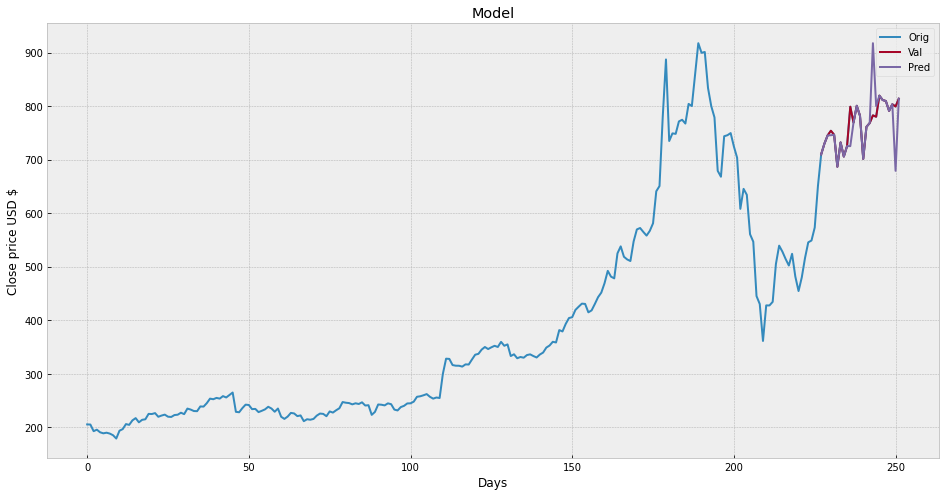

In [21]:
#Visualizing
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USD $')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


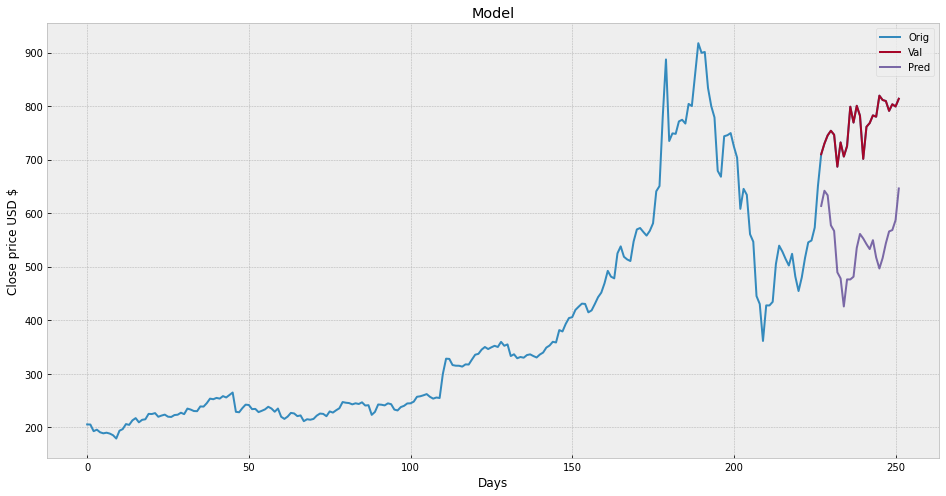

In [22]:
#Visualizing
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USD $')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()